## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.


---

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

---

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

---

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 



# Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# Load

In [2]:
!dir .

 Datentr„ger in Laufwerk C: ist Windows
 Volumeseriennummer: 20BD-6958

 Verzeichnis von C:\Users\andre\Documents\IRONHACK\UNIT_5\Labs\lab-eda-univariate

18.03.2024  15:55    <DIR>          .
18.03.2024  15:52    <DIR>          ..
18.03.2024  15:52    <DIR>          .ipynb_checkpoints
18.03.2024  15:52    <DIR>          data
18.03.2024  15:52             3.497 lab_eda_univariate.md
18.03.2024  15:55           439.703 Lab_EDA_Univariate_Analysis.ipynb
               2 Datei(en),        443.200 Bytes
               4 Verzeichnis(se), 687.530.545.152 Bytes frei


In [8]:
df = pd.read_csv("./data/raw/amz_uk_price_prediction_dataset.csv")

# Overview

In [9]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [10]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [11]:
# Retrieving the number of rows and columns in the dataframe
df.shape

(2443651, 9)

In [12]:
# Displaying the data typesme
df.dtypes # Pandas Series

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [13]:
df.info() # Pandas text

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


# EDA

In [14]:
# Retrieving the unique data types
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64'), dtype('bool')]

In [15]:
list(df.dtypes.unique())

[dtype('int64'), dtype('O'), dtype('float64'), dtype('bool')]

In [16]:
# Extracting column names with numerical data
df.select_dtypes("number").columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [17]:
# Counting and sorting the unique values for each numerical column in desc
df.select_dtypes("number").nunique().sort_values(ascending=False)

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

In [18]:
df["stars"].unique()

array([4.7, 4.6, 4.5, 4.8, 0. , 4.4, 4.3, 4.1, 4.9, 5. , 3.8, 3.6, 4. ,
       4.2, 3. , 3.9, 2.5, 3.4, 3.7, 3.2, 3.3, 3.5, 2.7, 2.1, 1. , 3.1,
       2. , 2.9, 2.8, 1.5, 2.2, 2.3, 2.6, 2.4, 1.4, 1.9, 1.8, 1.7, 1.6,
       1.2, 1.3, 1.1])

In [19]:
df.shape[0]

2443651

In [20]:
# Retrieving column names with object (typically string) data types
df.select_dtypes("object").columns

Index(['asin', 'title', 'category'], dtype='object')

In [21]:
# Counting and sorting the unique values for each object (string) column in descending order
df.select_dtypes("object").nunique().sort_values(ascending=False)


asin        2222742
title       2077591
category        296
dtype: int64

# Data Cleaning

### Checking for Missing Data

In [22]:
# Checking for missing data
df.isnull().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [23]:
# Removing the "Id" column from the dataframe
df.drop("uid", inplace=True, axis=1) 

# Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?


1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [24]:
# Frequency table for 'category'
frequency_table = df['category'].value_counts()

# Calculating the proportion of each unique value in the 'category'
proportion_table = df['category'].value_counts(normalize=True)

frequency_table.head(5), proportion_table.head(5)*100

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
 Name: count, dtype: int64,
 category
 Sports & Outdoors                         34.221949
 Beauty                                     0.790293
 Handmade Clothing, Shoes & Accessories     0.786896
 Bath & Body                                0.781290
 Birthday Gifts                             0.776625
 Name: proportion, dtype: float64)

In [30]:
frequency_table.index[:5]

'Sports & Outdoors'

In [32]:
# The 5 Top most listed product categories are:
print(f"The top 5 categories are: {frequency_table.index[:5]}")

The top 5 categories are: Index(['Sports & Outdoors', 'Beauty', 'Handmade Clothing, Shoes & Accessories',
       'Bath & Body', 'Birthday Gifts'],
      dtype='object', name='category')


2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

<Axes: ylabel='category'>

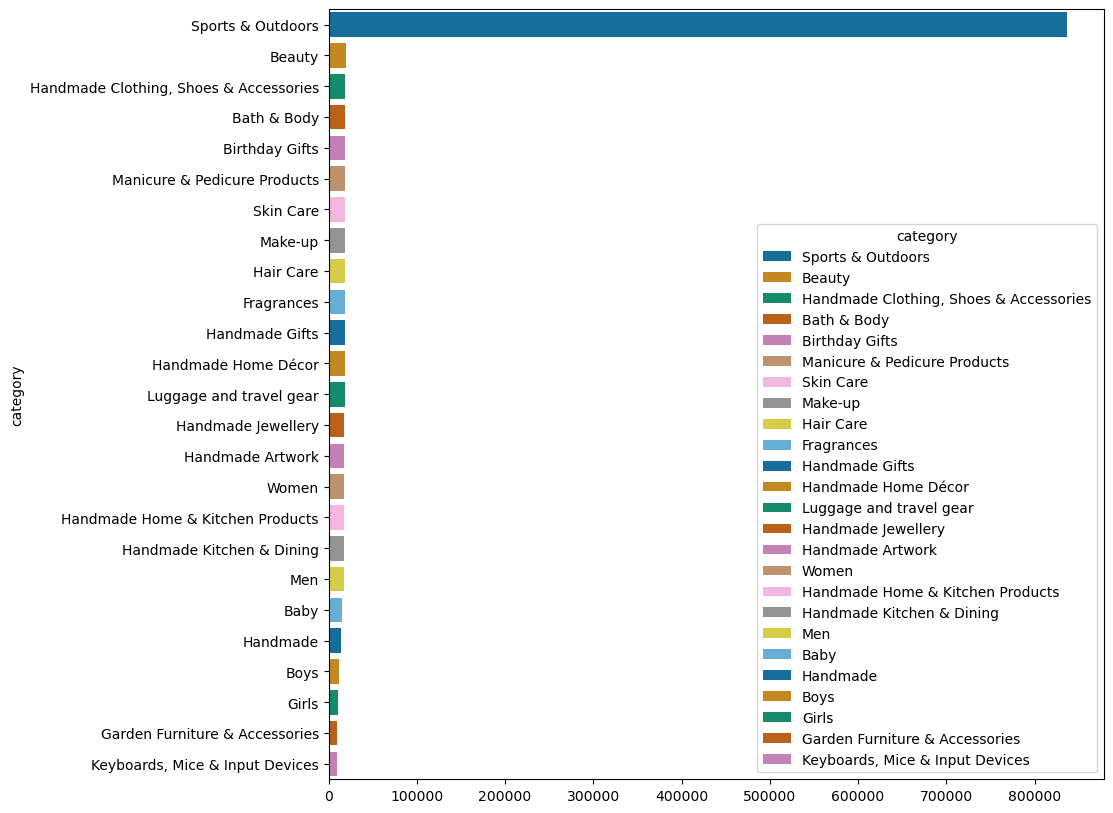

In [34]:
# Plotting a bar chart using the values from the frequency table - Top 25
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y=frequency_table[:25].index, x=frequency_table[:25].values, hue=frequency_table[:25].index, palette="colorblind", legend=True, ax=ax)


Text(0.5, 0, 'Frequency')

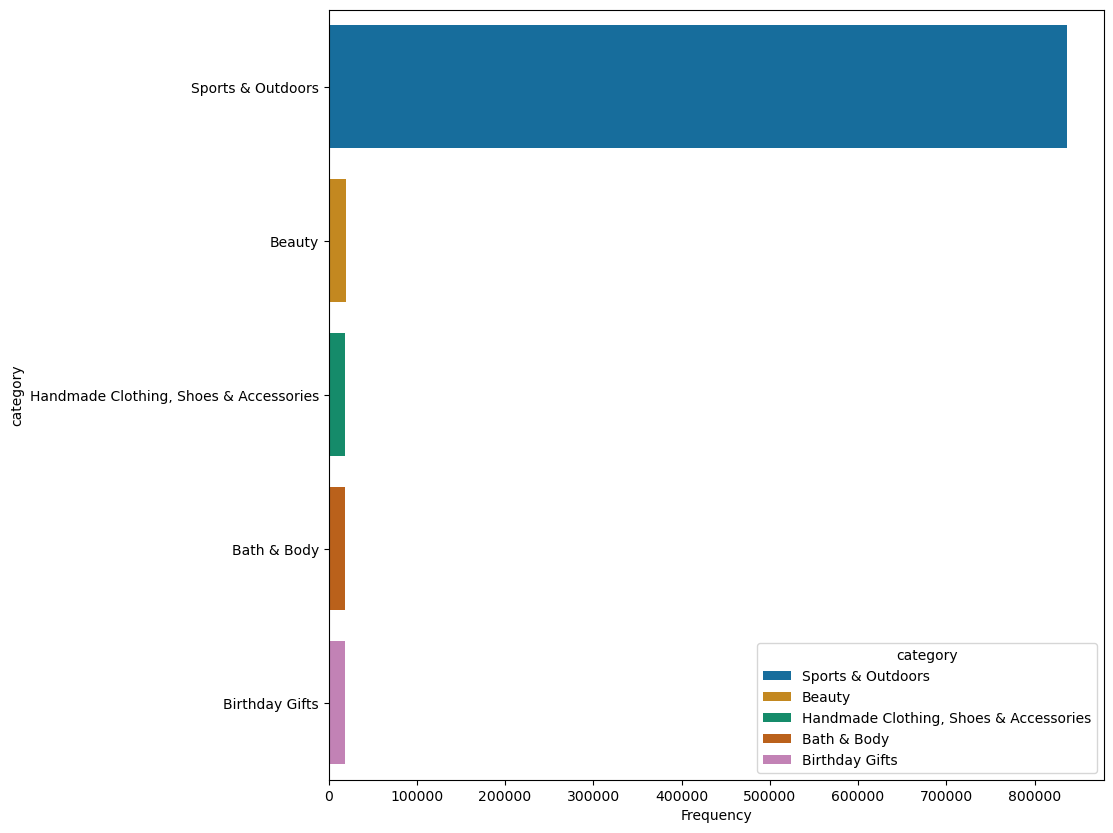

In [35]:
# Plotting a bar chart using the values from the frequency table - Top 5
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y=frequency_table[:5].index, x=frequency_table[:5].values, hue=frequency_table[:5].index, palette="colorblind", legend=True, ax=ax)

ax.set_xlabel("Frequency")


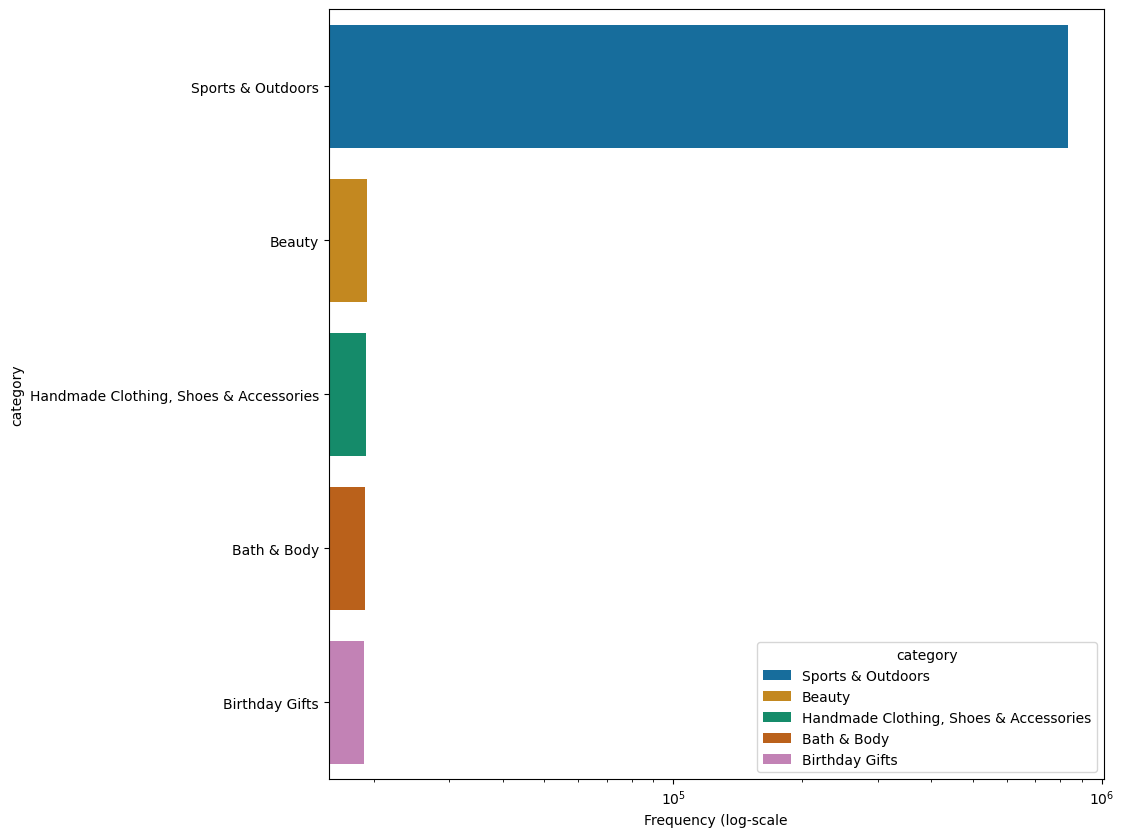

In [36]:
# Plotting a bar chart using the values from the frequency table Top 5 log scale
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y=frequency_table[:5].index, x=frequency_table[:5].values, hue=frequency_table[:5].index, palette="colorblind", legend=True, ax=ax)

ax.set_xlabel("Frequency (log-scale")

ax.set_xscale('log')

**Insights** from the Bar Charts:

1. The bar chart confirms the dominance of the `Sport & Outdoors` section within the dataset. 
2. The bar representing `Sport & Outdoors` is significantly taller than the others, emphasizing its higher frequency.

<Axes: ylabel='count'>

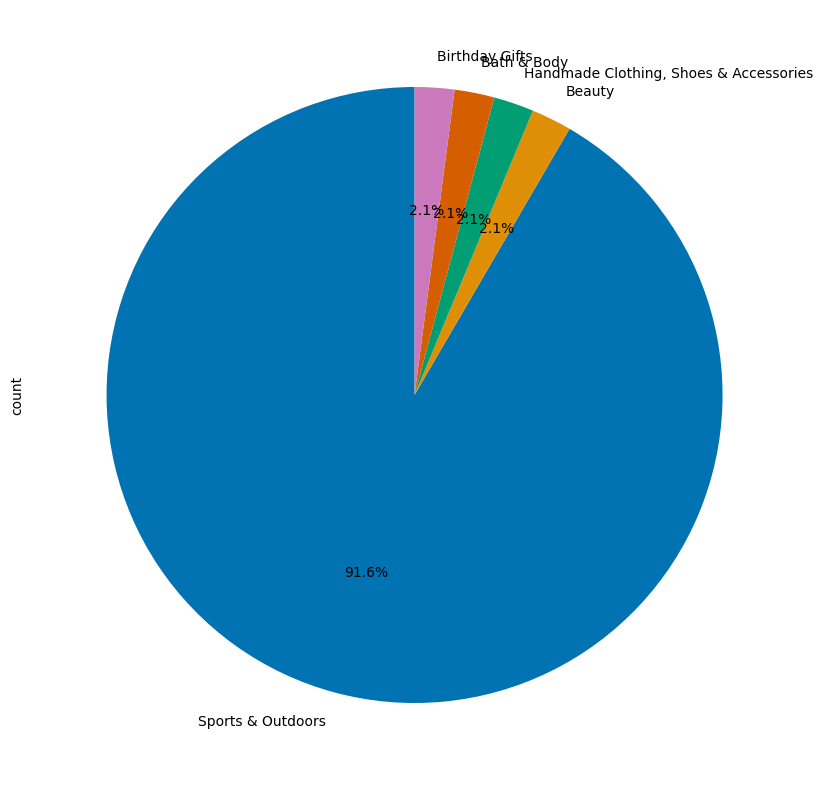

In [50]:
# Plotting a pie chart of the 'category' column value counts, with percentage labels, 
# starting at angle 90, and using colors from the "Set3" Seaborn palette
plt.figure(figsize=(10, 10))
df['category'].value_counts()[:5].plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("colorblind"))

**Insights** from the Bar Charts:
Similar to the bar graph the pie chart demonstrates that the `Sport & Outdoors` category is dominating category.

# Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [65]:
df['price'].describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [52]:
# Mean
df['price'].mean().round(2)

89.24

In [53]:
# Median
df['price'].median()

19.09

In [54]:
# Mode
df['price'].mode()[0]

9.99

**Insights** Measures of Centrality:

The average price point of products listed is 89.24. 
However, the mode, which is 9.99, is significantly different. This suggests that while the average price is relatively high, the most frequently occurring price point is much lower. This difference between the average and the mode highlights the presence of both higher-priced and lower-priced products in the dataset.

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [59]:
# Standard Deviation
df['price'].var().round(2)

119445.49

In [60]:
# Standard Deviation
df['price'].std().round(2)

345.61

In [61]:
# Range
min_price = df['price'].min()
max_price = df['price'].max()

range = max_price - min_price
range

100000.0

In [62]:
# Inerquartile

quantiles_price_q25 = df['price'].quantile(0.25)
quantiles_price_q75 = df['price'].quantile(0.75)

quantiles_price_q75, quantiles_price_q25

(45.99, 9.99)

In [63]:
int_quant_range = quantiles_price_q75 - quantiles_price_q25
int_quant_range

36.0

**Insights** Measures of Dispersion:<br>
With a standard deviation of 345, we can interpret that the prices of products vary highly from the average price point of 89.24.

The variance indicates a considerable degree of variability among the prices of products listed.

With an interquartile range of 36 tells us that 50% of prices fall within this range. But considering the standard deviation and variance, we can speculate that there is a big spread in prices, with potential outliers

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 


In [92]:
df[df['price'] == df['price'].max()]

,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category,price_category,price_quantile
2008013,B091F5Y3CT,HB FBA Test Treadmill,0.0,0,100000.0,False,0,Sports & Outdoors,Q4,Q4


In [88]:
df['price'].value_counts(ascending=False)

price
9.99       48922
12.99      38823
8.99       34058
7.99       33632
14.99      32570
           ...  
2398.99        1
1453.08        1
1785.63        1
1347.36        1
317.34         1
Name: count, Length: 82916, dtype: int64

In [105]:
df['price'].value_counts()[0]

20

In [106]:
df['price'][df['price'] > 1000]

674        1149.00
746        2499.00
787        1399.00
800        1389.00
892        1699.00
            ...   
2438195    1077.13
2438225    1025.25
2440857    2209.00
2441492    1429.00
2441493    1759.00
Name: price, Length: 39114, dtype: float64

In [89]:
df['price'].max()

100000.0

<Axes: xlabel='price', ylabel='Count'>

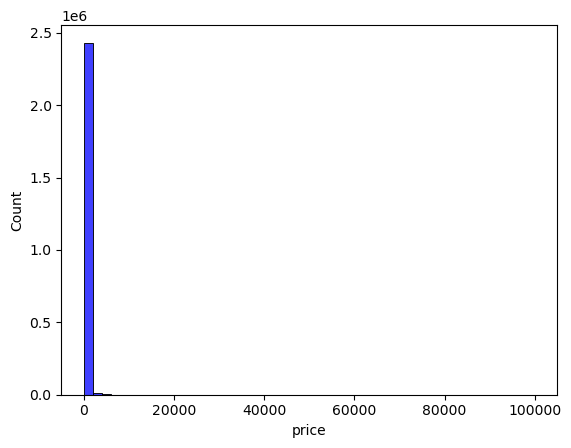

In [121]:
# Histogrms
sns.histplot(df['price'],  bins=50, color="blue")

<Axes: xlabel='price', ylabel='Count'>

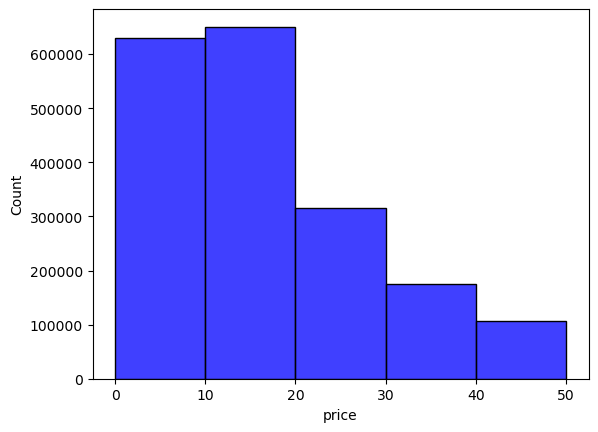

In [120]:
# Histogrms
sns.histplot(df['price'][df['price'] < 50],  bins=5, color="blue")

<Axes: xlabel='price', ylabel='Count'>

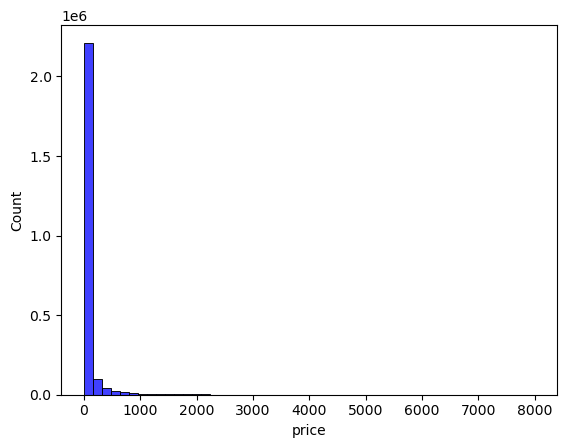

In [114]:
# Histogrms

sns.histplot(df['price'][df['price'] < 8000],  bins=50, color="blue")

<Axes: ylabel='price'>

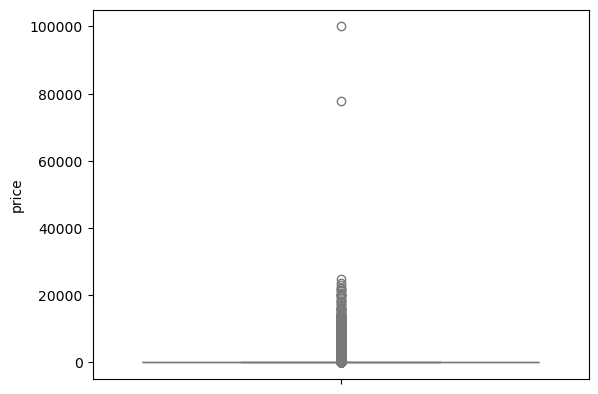

In [87]:
# Plotting a boxplot
sns.boxplot(data = df['price'], color="lightblue")

<Axes: ylabel='price'>

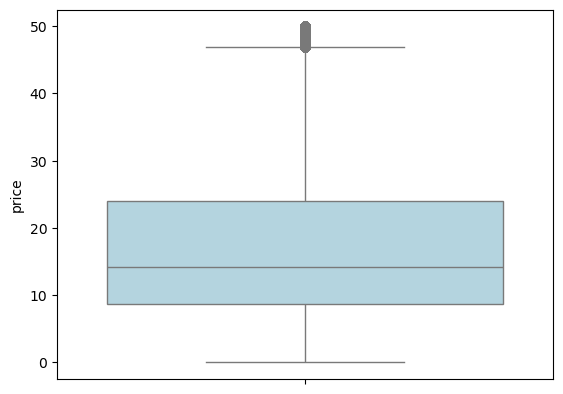

In [119]:
# Plotting a boxplot
sns.boxplot(data = df['price'][df['price'] < 50], color="lightblue")

**Insights** Visualization:<br>
- Most of the price are in the range of 9 to 25. The Histoplot is hard to read because there are many outliers in the higher price range that are less frequent. To solve this one can focus on a subset of price sections
- There products that are prices significantly higher than the rest as shown by the box plot. 

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?


In [122]:
df['stars'].unique()

array([4.7, 4.6, 4.5, 4.8, 0. , 4.4, 4.3, 4.1, 4.9, 5. , 3.8, 3.6, 4. ,
       4.2, 3. , 3.9, 2.5, 3.4, 3.7, 3.2, 3.3, 3.5, 2.7, 2.1, 1. , 3.1,
       2. , 2.9, 2.8, 1.5, 2.2, 2.3, 2.6, 2.4, 1.4, 1.9, 1.8, 1.7, 1.6,
       1.2, 1.3, 1.1])

In [123]:
df['stars'].isna().sum()

0

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?



In [137]:
df['stars'].value_counts().head(10)

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
Name: count, dtype: int64

In [124]:
df['stars'].describe()

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [125]:
# Mean
df['stars'].mean().round(2)

2.15

In [138]:
df['stars'][df['stars']!=0].mean().round(2)

4.32

In [126]:
# Median
df['stars'].median()

0.0

In [139]:
df['stars'][df['stars']!=0].median().round(2)

4.4

In [127]:
# Mode
df['stars'].mode()[0]

0.0

In [140]:
df['stars'][df['stars']!=0].mode().round(2)

0    4.5
Name: stars, dtype: float64

**Insights** Measures of Centrality::<br>
- If the 0 ratings (no ratings were found.) are not considered than customers generaly vote high (mode=4.5) with a clear trend towards higher ratings

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?


In [128]:
# Standard Deviation
df['stars'].var().round(2)

4.82

In [147]:
df['stars'][df['stars']!=0].var().round(2)

0.31

In [142]:
# Standard Deviation
df['stars'].std().round(2)

2.19

In [149]:
df['stars'][df['stars']!=0].std().round(2)

0.56

In [153]:
# Range
min_stars = df['stars'][df['stars']!=0].min()
max_stars = df['stars'][df['stars']!=0].max()

range = max_stars - min_stars
range

4.0

In [154]:
# Inerquartile

quantiles_stars_q25 = df['stars'][df['stars']!=0].quantile(0.25)
quantiles_stars_q75 = df['stars'][df['stars']!=0].quantile(0.75)

quantiles_stars_q75, quantiles_stars_q25

(4.6, 4.1)

In [155]:
int_quant_range_stars = quantiles_stars_q75 - quantiles_stars_q25
int_quant_range_stars

0.5

**Insights** Measures of Centrality:<br>
- If the 0 ratings (no ratings were found.) are not considered than there is generally not a high variance between the values

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?


In [157]:
skewness_price = df['stars'][df['stars']!=0].skew() # [-2,2] -> Symmetrical
kurtosis_price = df['stars'][df['stars']!=0].kurtosis()

skewness_price, kurtosis_price

(-2.3795681122127945, 9.78193769066435)

**Insights** Shape of the Distribution:<br>
- The ratings are skewed to the left but with a trend towards higher values

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

<Axes: xlabel='stars', ylabel='Count'>

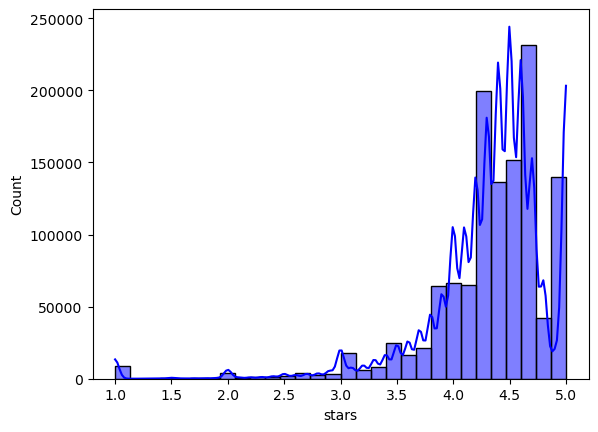

In [158]:
# Histogrms

sns.histplot(df['stars'][df['stars']!=0], kde=True, bins=30, color="blue")

<Axes: xlabel='stars', ylabel='Count'>

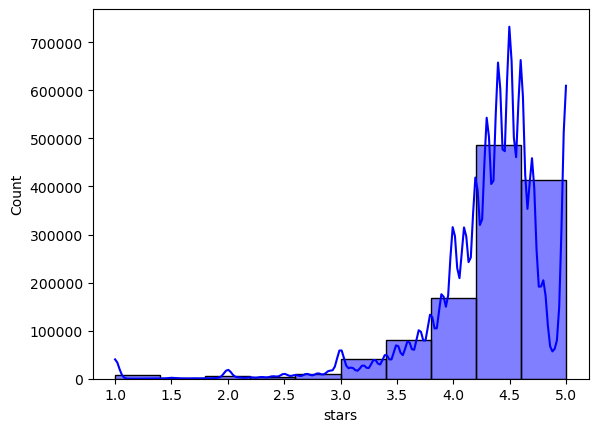

In [159]:

sns.histplot(df['stars'][df['stars']!=0], kde=True, bins=10, color="blue")

**Insights** Shape of the Distribution:<br>
- The 4.5 ratings are more common